# 0.) Import the US Perminent Visas using zip extractor

In [3]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [5]:
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [10]:
import zipfile

df = pd.read_csv("/content/us_perm_visas.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


# 1.) US perm Visas csv from cycle using zip extractor


In [ ]:
df_select = df[["class_of_ad"]]

# 2.) Choose 4 features you think are important. Case_status is your target variable


In [21]:
df_select = df[["case_status", "class_of_admission", "wage_offer_from_9089", "employer_city", "us_economic_sector"]]
df_select.head()

,case_status,class_of_admission,wage_offer_from_9089,employer_city,us_economic_sector
0,Certified,J-1,75629.0,NEW YORK,IT
1,Denied,B-2,37024.0,CARLSTADT,Other Economic Sector
2,Certified,H-1B,47923.0,GLEN ALLEN,Aerospace
3,Certified,B-2,10.97,FLUSHING,Other Economic Sector
4,Certified,L-1,100000.0,ALBANY,Advanced Mfg


In [22]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   case_status           374362 non-null  object
 1   class_of_admission    351517 non-null  object
 2   wage_offer_from_9089  259591 non-null  object
 3   employer_city         374348 non-null  object
 4   us_economic_sector    129068 non-null  object
dtypes: object(5)
memory usage: 14.3+ MB


# 3.) Clean your data for a decision tree


In [23]:
df_select.dropna(inplace=True)
df_select.reset_index(inplace=True)
df_select

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,index,case_status,class_of_admission,wage_offer_from_9089,employer_city,us_economic_sector
0,0,Certified,J-1,75629.0,NEW YORK,IT
1,1,Denied,B-2,37024.0,CARLSTADT,Other Economic Sector
2,2,Certified,H-1B,47923.0,GLEN ALLEN,Aerospace
3,3,Certified,B-2,10.97,FLUSHING,Other Economic Sector
4,4,Certified,L-1,100000.0,ALBANY,Advanced Mfg
...,...,...,...,...,...,...
18736,20571,Certified,H-2B,23.73,MINTURN,Other Economic Sector
18737,20572,Withdrawn,EWI,26.59,LOS ANGELES,Other Economic Sector
18738,20573,Withdrawn,E-2,45.0,BELLEVUE,Aerospace
18739,20574,Denied,Not in USA,8.1,TROUTMAN,Agribusiness


In [33]:
 df_select["wage_offer_from_9089"] = pd.to_numeric(df_select["wage_offer_from_9089"], errors='coerce')

<ipython-input-33-f4e2354017db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["wage_offer_from_9089"] = pd.to_numeric(df_select["wage_offer_from_9089"], errors='coerce')


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
column_names = list(df_select.columns)
column_names.remove('index')

le_dict = {}
for column in column_names:
  # Initialize the model
  le = LabelEncoder()

  # Label the categorical variables
  df_select[f"{column}_labeled"] = le.fit_transform(df_select[column])

  # Store the label encoder in a dictionary
  le_dict[column] = le

df_select.head()

<ipython-input-35-df6402f36f04>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select[f"{column}_labeled"] = le.fit_transform(df_select[column])


,index,case_status,class_of_admission,wage_offer_from_9089,employer_city,us_economic_sector,case_status_labeled,class_of_admission_labeled,wage_offer_from_9089_labeled,employer_city_labeled,us_economic_sector_labeled,case_status_labeled_labeled,class_of_admission_labeled_labeled,wage_offer_from_9089_labeled_labeled,employer_city_labeled_labeled,us_economic_sector_labeled_labeled
0,0,Certified,J-1,75629.00,NEW YORK,IT,0,25,2787,1222,13,0,25,2787,1222,13
1,1,Denied,B-2,37024.00,CARLSTADT,Other Economic Sector,2,4,788,268,14,2,4,788,268,14
2,2,Certified,H-1B,47923.00,GLEN ALLEN,Aerospace,0,17,1230,664,1,0,17,1230,664,1
3,3,Certified,B-2,10.97,FLUSHING,Other Economic Sector,0,4,27,595,14,0,4,27,595,14
4,4,Certified,L-1,100000.00,ALBANY,Advanced Mfg,0,27,4586,18,0,0,27,4586,18,0


In [36]:
X = df_select[['class_of_admission_labeled','wage_offer_from_9089_labeled','employer_city_labeled','us_economic_sector_labeled']]
y = df_select[['case_status_labeled']] 

# 4.) Fit and plot a decision tree of depth 3


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

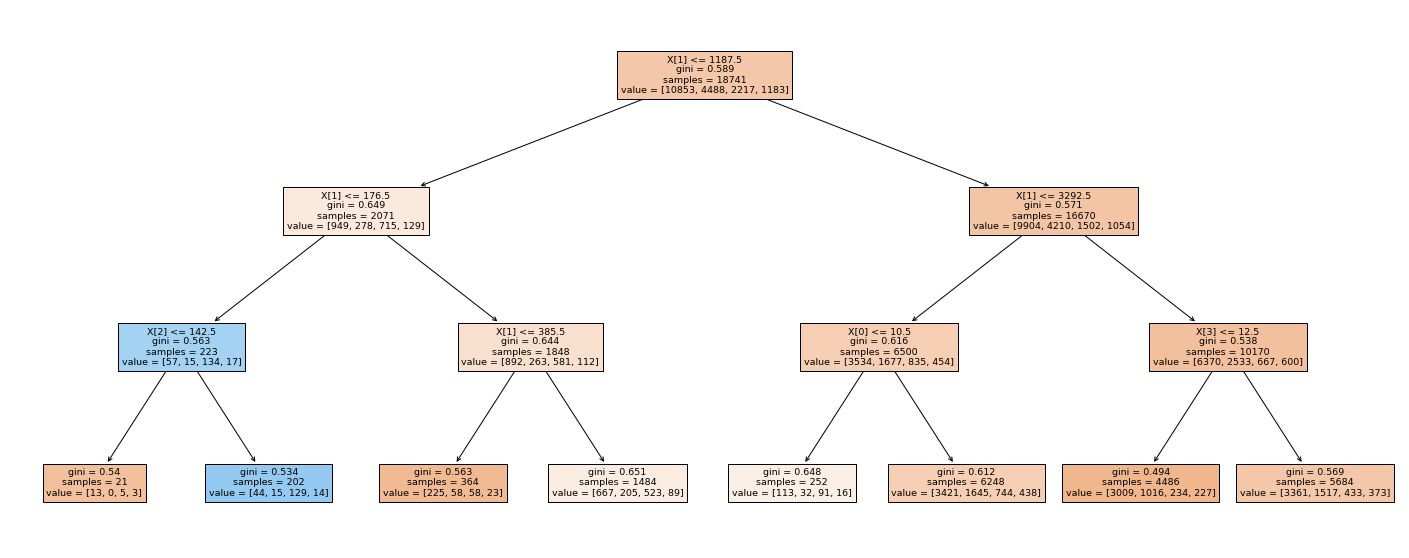

In [38]:
# Fit the decision tree model
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(25,10))
tree.plot_tree(clf, filled=True)
plt.show()

# 5.) Write your interpretation of the largest (by sample size) leaf node


From the decision nodes are leaf nodes that represent the consequences of those decisions. Each decision node represents a question or split point, and the leaf nodes that stem from a decision node represent the possible answers. From the decision tree, the leaf node with 6248 samples is the largest leaf, with 0.612 gini index. The gini index reflects that the sample is more than equally distribued elements; rather it reflects the randomeness distribution since it's close to 1. 

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
outputs = []
max_depths = [1,2,3]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
for md in max_depths:
  clf = DecisionTreeClassifier(max_depth=md)

  # Train the model
  clf.fit(X_train, y_train)

  # Test the model with out of sample data
  score = clf.score(X_test, y_test)
  outputs.append(score)
print(outputs)

[0.5761536409709256, 0.5793544945318752, 0.5801547079221125]
